In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
TC = pd.read_csv("ToyotaCorolla.csv", encoding="ISO-8859-1")
cols_needed = ["Price", "Age_08_04","KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
TC = TC[(cols_needed)]
TC


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
df=pd.DataFrame(TC)

In [5]:
df=df.rename(columns={"Age_08_04":"age"})

In [6]:
df=df.rename(columns={"Quarterly_Tax":"qur"})

In [7]:
df.head()

,Price,age,KM,HP,cc,Doors,Gears,qur,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
df.describe()

,Price,age,KM,HP,cc,Doors,Gears,qur,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x216385a4580>,
 'caps': [<matplotlib.lines.Line2D at 0x216385a4c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x216385a4220>],
 'medians': [<matplotlib.lines.Line2D at 0x216385b1340>],
 'fliers': [<matplotlib.lines.Line2D at 0x216385b1640>],
 'means': []}

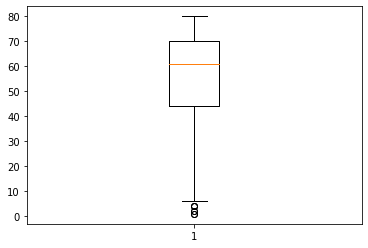

In [9]:
plt.boxplot(df["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21638646310>,
 'caps': [<matplotlib.lines.Line2D at 0x216386469d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21638638f70>],
 'medians': [<matplotlib.lines.Line2D at 0x216386510d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x216386513d0>],
 'means': []}

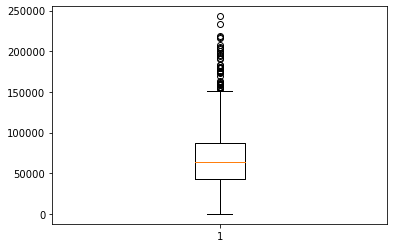

In [10]:
plt.boxplot(df["KM"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2163869db80>,
 'caps': [<matplotlib.lines.Line2D at 0x216386a9280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2163869d820>],
 'medians': [<matplotlib.lines.Line2D at 0x216386a9940>],
 'fliers': [<matplotlib.lines.Line2D at 0x216386a9c40>],
 'means': []}

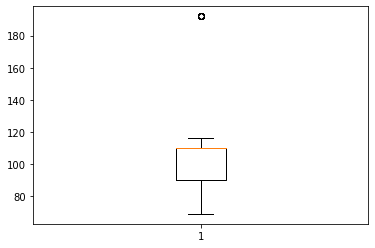

In [11]:
plt.boxplot(df["HP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21638700400>,
 'caps': [<matplotlib.lines.Line2D at 0x21638700ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x216387000a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2163870a1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2163870a4c0>],
 'means': []}

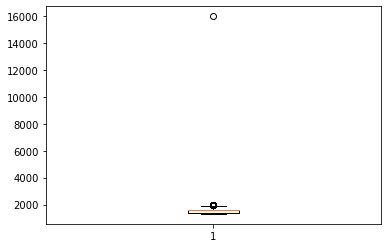

In [12]:
plt.boxplot(df["cc"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2163875d370>,
 'caps': [<matplotlib.lines.Line2D at 0x2163875da30>,
 'boxes': [<matplotlib.lines.Line2D at 0x21638750fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21638768130>],
 'fliers': [<matplotlib.lines.Line2D at 0x21638768430>],
 'means': []}

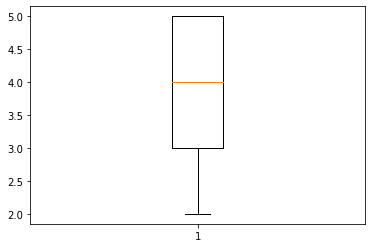

In [13]:
plt.boxplot(df["Doors"])

In [14]:
df.skew()

Price      1.703885
age       -0.826702
KM         1.015912
HP         0.955836
cc        27.431793
Doors     -0.076395
Gears      2.283960
qur        1.993834
Weight     3.108639
dtype: float64

In [15]:
# Correlation matrix 
df.corr()


,Price,age,KM,HP,cc,Doors,Gears,qur,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qur,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [16]:
import seaborn as sns

Index(['Price', 'age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'qur', 'Weight'], dtype='object')

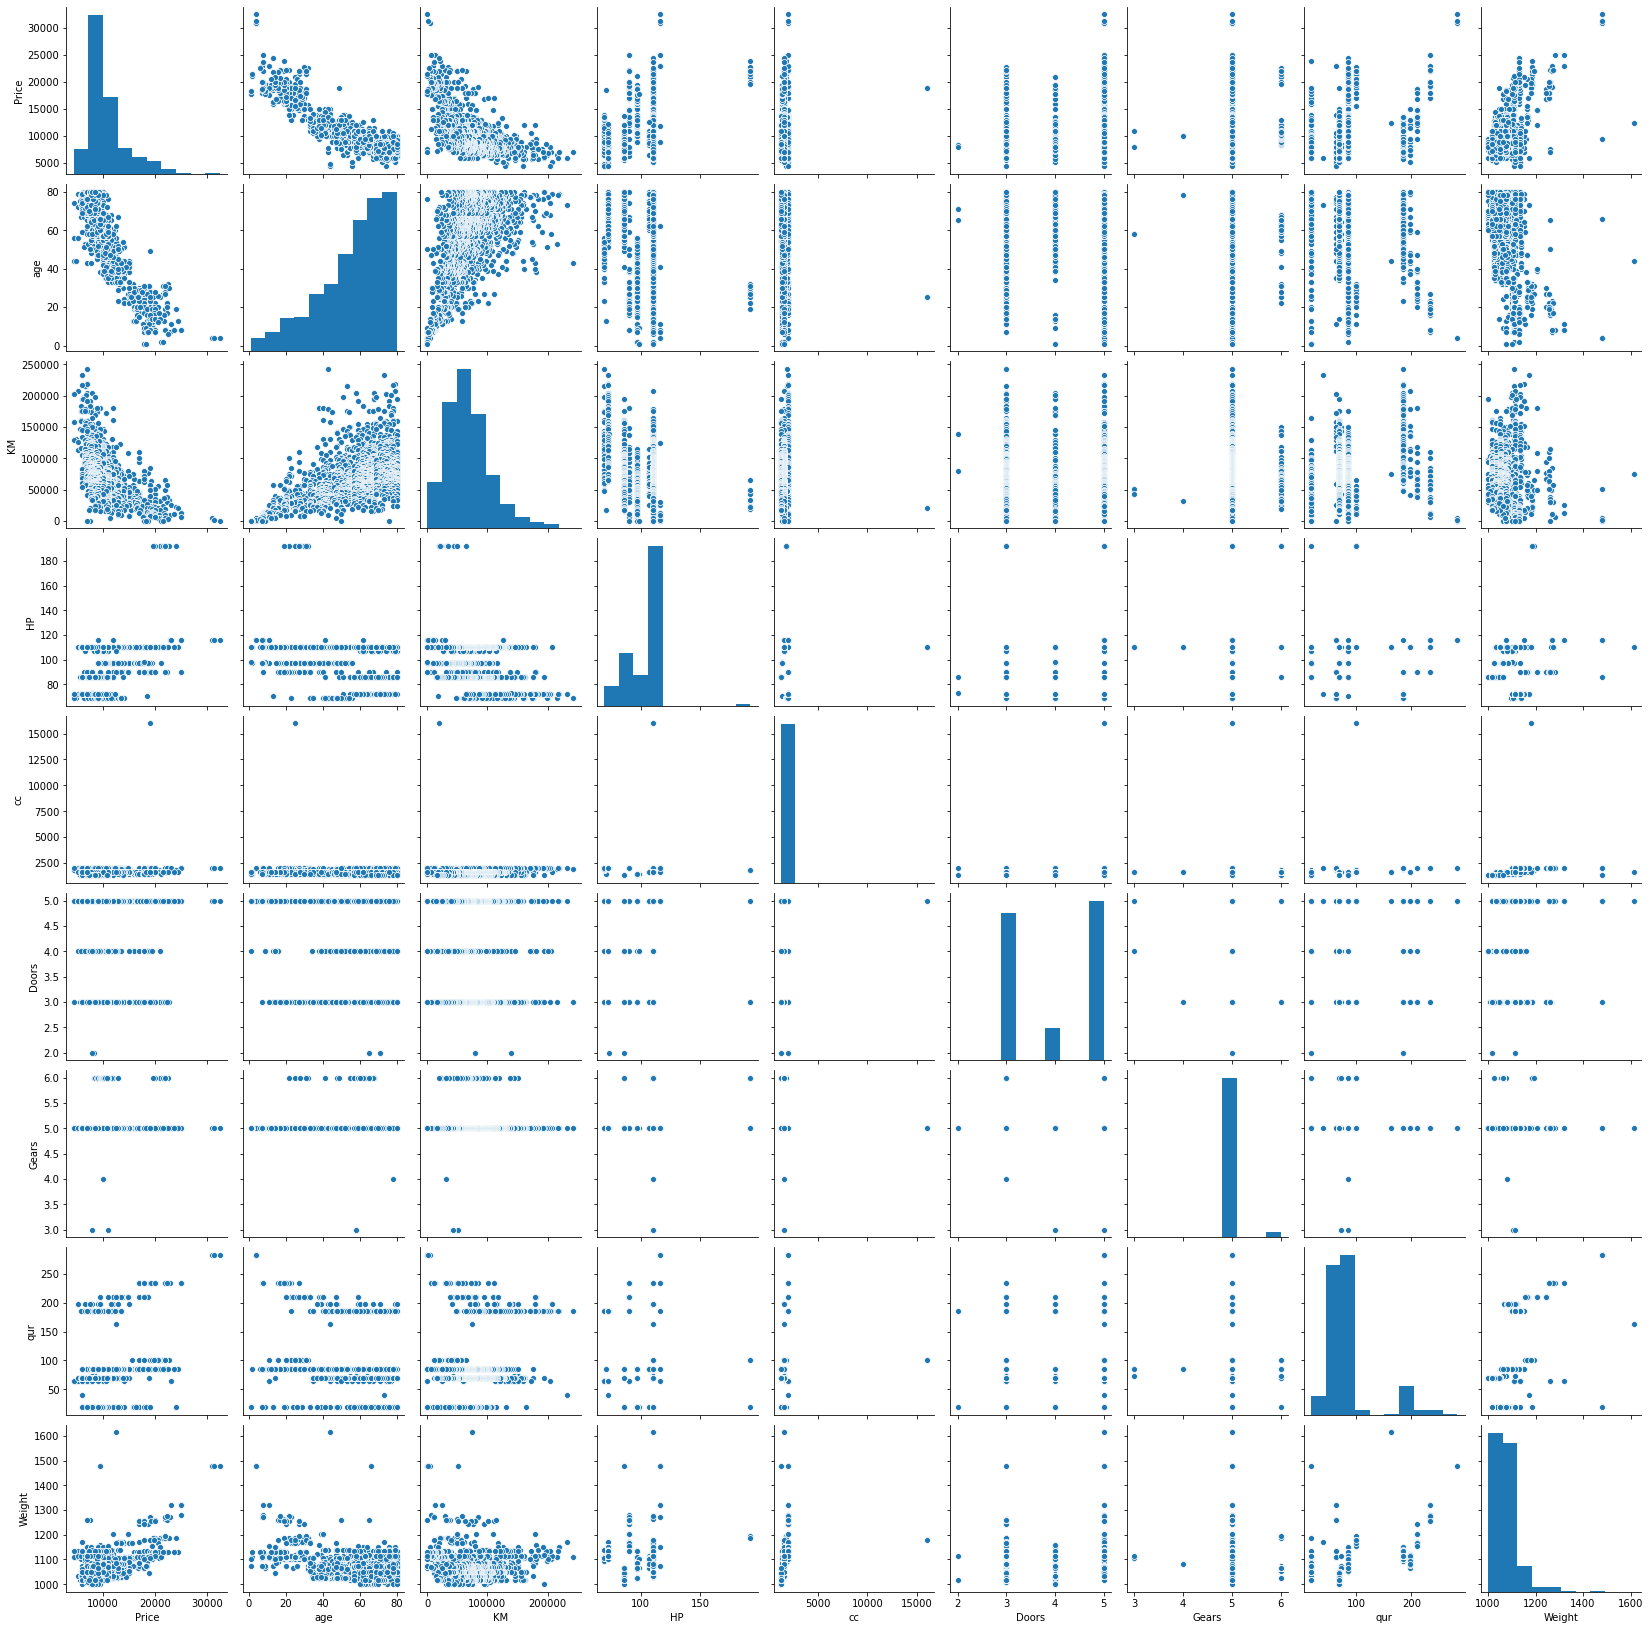

In [17]:
sns.pairplot(df)
df.columns

In [18]:
#preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model

In [19]:
# Preparing model                  
model1 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qur+Weight',data=df).fit() # regression model


In [20]:
# Getting coefficients of variables               
model1.params


Intercept   -5573.106358
age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
qur             3.949081
Weight         16.958632
dtype: float64

In [22]:
# Summary # 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:31:02   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
qur            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model_v=smf.ols('Price~Doors',data = df).fit()   
#t and p-Values
print(model_v.tvalues, '\n', model_v.pvalues)  
# p-value <0.05 .. It is significant ,if we check separtely it is significant



Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [24]:
model_w=smf.ols('Price~cc',data = df).fit()   
#t and p-Values
print(model_w.tvalues, '\n', model_w.pvalues)  
# p-value <0.05 .. It is significant ,if we check separtely it is significant


Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [25]:
model_x=smf.ols('Price~KM',data = df).fit()   
#t and p-Values
print(model_x.tvalues, '\n', model_x.pvalues)  
# p-value <0.05 .. It is significant ,if we check separtely it is significant


Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [26]:
# Preparing model based only on CC & Door
model_wv=smf.ols('Price~Doors+cc',data = df).fit()  
print(model_wv.tvalues, '\n', model_wv.pvalues)

Intercept    12.620704
Doors         6.816153
cc            4.340400
dtype: float64 
 Intercept    1.056885e-34
Doors        1.373469e-11
cc           1.521992e-05
dtype: float64


In [35]:
rsq_a = smf.ols('age~KM+HP+cc+Doors+Gears+qur+Weight',data=df).fit().rsquared  
vif_a = 1/(1-rsq_a) 

rsq_k = smf.ols('KM~age+HP+cc+Doors+Gears+qur+Weight',data=df).fit().rsquared  
vif_k = 1/(1-rsq_k) 

rsq_h = smf.ols('HP~KM+age+cc+Doors+Gears+qur+Weight',data=df).fit().rsquared  
vif_h = 1/(1-rsq_h) 

rsq_c = smf.ols('cc~KM+HP+age+Doors+Gears+qur+Weight',data=df).fit().rsquared  
vif_c = 1/(1-rsq_c) 

rsq_d = smf.ols('Doors~KM+HP+cc+age+Gears+qur+Weight',data=df).fit().rsquared  
vif_d = 1/(1-rsq_d)

rsq_g = smf.ols('Gears~KM+HP+cc+Doors+age+qur+Weight',data=df).fit().rsquared  
vif_g = 1/(1-rsq_g) 

rsq_q = smf.ols('qur~KM+HP+cc+Doors+Gears+age+Weight',data=df).fit().rsquared  
vif_q = 1/(1-rsq_q) 

rsq_w = smf.ols('Weight~KM+HP+cc+Doors+Gears+qur+age',data=df).fit().rsquared  
vif_w = 1/(1-rsq_w) 

# Storing vif values in a data frame
d1 = {'Variables':['age','KM','HP','cc','Doors','Gears','qur','Weight'],'VIF':[vif_a,vif_k,vif_h,vif_c,vif_d,vif_g,vif_q,vif_w]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

#which ever variable has the highest VIF value that value we need to remove from equation


,Variables,VIF
0,age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,qur,2.311431
7,Weight,2.516420


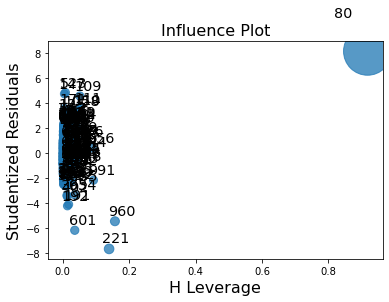

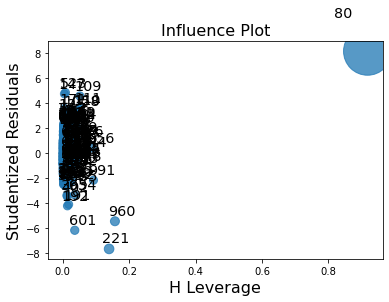

In [36]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [37]:
df_new=df.drop(df.index[[80]],axis=0)

In [38]:
model2 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qur+Weight',data = df_new).fit()    

# Getting coefficients of variables        
model2.params

# Summary
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:49:58   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
cc            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
qur            9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 # P value for all the input variables <0.05 and R^2 value is 0.869 

# 2nd Assignment, 50_Startups

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [61]:
#Read the data
Startup= pd.read_csv("50_Startups.csv")
Startup.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [62]:
Startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [63]:
#check for missing values
Startup.isna().sum()

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [64]:
Startup.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


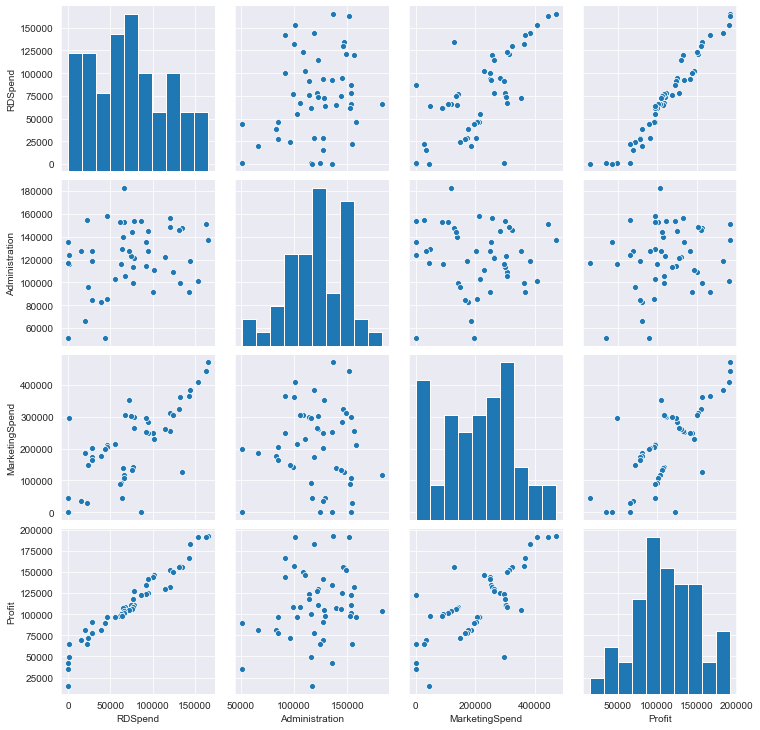

In [65]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Startup)

In [66]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDSpend+Administration+MarketingSpend+State',data=Startup).fit()

In [67]:
#Coefficients
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RDSpend                  0.806023
Administration          -0.027004
MarketingSpend           0.026980
dtype: float64

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.34e-27
Time:                        19:29:15   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RDSpend               0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
MarketingSpend        0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
model_s=smf.ols('Profit~State',data = Startup).fit()  
#t and p-Values
print(model_s.tvalues, '\n', model_s.pvalues)  

Intercept            10.536302
State[T.Florida]      1.049860
State[T.New York]     0.706364
dtype: float64 
 Intercept            5.774813e-14
State[T.Florida]     2.991510e-01
State[T.New York]    4.834492e-01
dtype: float64


In [73]:
model_a=smf.ols('Profit~Administration',data = Startup).fit()  
#t and p-Values
print(model_a.tvalues, '\n', model_a.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [74]:
model_m=smf.ols('Profit~MarketingSpend',data = Startup).fit()  
#t and p-Values
print(model_m.tvalues, '\n', model_m.pvalues)  

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [82]:
rsq_r = smf.ols('RDSpend~Administration+MarketingSpend+State',data=Startup).fit().rsquared  
vif_r = 1/(1-rsq_r) 

rsq_a = smf.ols('Administration~RDSpend+MarketingSpend+State',data=Startup).fit().rsquared  
vif_a = 1/(1-rsq_a) 

rsq_m = smf.ols('MarketingSpend~Administration+RDSpend+State',data=Startup).fit().rsquared  
vif_m = 1/(1-rsq_m) 

#rsq_s = smf.ols('State~MarketingSpend+Administration+RDSpend',data=Startup).fit().rsquared  
#vif_s = 1/(1-rsq_s) 

d1 = {'Variables':['MarketingSpend','Administration','RDSpend',],'VIF':[vif_m,vif_a,vif_r]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,MarketingSpend,2.416797
1,Administration,1.177766
2,RDSpend,2.495511


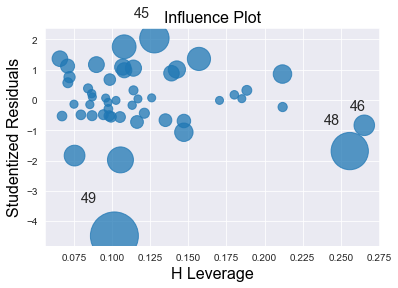

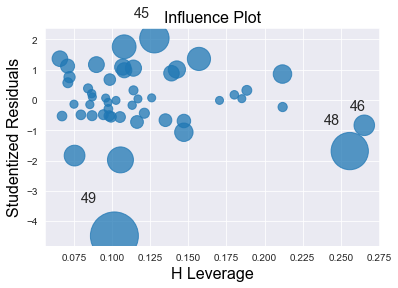

In [83]:
import statsmodels.api as sm
sm.graphics.influence_plot(model)

In [90]:
df_New=Startup.drop(df.index[[49]],axis=0)

In [91]:
df_New=Startup.drop(df.index[[48]],axis=0)

In [92]:
df_New=Startup.drop(df.index[[45]],axis=0)

In [93]:
df_New.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [96]:
model2 = smf.ols('Profit~RDSpend+Administration+MarketingSpend+State',data = df_New).fit()    

# Getting coefficients of variables        
model2.params

# Summary
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     177.4
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.51e-27
Time:                        20:06:34   Log-Likelihood:                -513.12
No. Observations:                  49   AIC:                             1038.
Df Residuals:                      43   BIC:                             1050.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.949e+04   6658.573      7.433      0.000    3.61e+04    6.29e+04
State[T.Florida]   -153.6136   3261.255     -0.047      0.963   -6730.561    6423.334
State[T.New York] -1389.2577   3214.467     -0.432      0.668   -7871.847    5093.332
RDSpend               0.8156      0.045     18.093      0.000       0.725       0.906
Administration       -0.0316      0.051     -0.626      0.535      -0.133       0.070
MarketingSpend        0.0301      0.017      1.811      0.077      -0.003       0.064
==============================================================================
Omnibus:                       15.874   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.216
Skew:                          -1.025   Prob(JB):                     9.09e-06
Kurtosis:                       5.678   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""